<a href="https://colab.research.google.com/github/kaansen97/Image-Classification/blob/main/Premier_Class_Image_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
classes=np.unique(y_train)
nClasses=len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


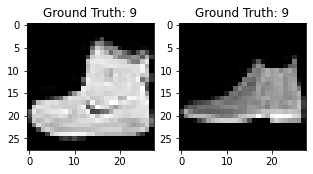

In [ ]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(X_train[0,:,:],cmap='gray')
plt.title("Ground Truth: {}".format(y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0,:,:],cmap='gray')
plt.title("Ground Truth: {}".format(y_test[0]));

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=13)


In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))


In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 84s 111ms/step - loss: 0.4748 - accuracy: 0.8267 - val_loss: 0.3557 - val_accuracy: 0.8686
Epoch 2/20
750/750 [==============================] - 83s 110ms/step - loss: 0.2946 - accuracy: 0.8921 - val_loss: 0.2848 - val_accuracy: 0.8963
Epoch 3/20
750/750 [==============================] - 82s 110ms/step - loss: 0.2466 - accuracy: 0.9081 - val_loss: 0.2561 - val_accuracy: 0.9070
Epoch 4/20
750/750 [==============================] - 83s 110ms/step - loss: 0.2141 - accuracy: 0.9216 - val_loss: 0.2355 - val_accuracy: 0.9143
Epoch 5/20
750/750 [==============================] - 83s 111ms/step - loss: 0.1901 - accuracy: 0.9287 - val_loss: 0.2350 - val_accuracy: 0.9165
Epoch 6/20
750/750 [==============================] - 85s 114ms/step - loss: 0.1721 - accuracy: 0.9349 - val_loss: 0.2689 - val_accuracy: 0.9007
Epoch 7/20
750/750 [==============================] - 84s 112ms/step - loss: 0.1501 - accuracy: 0.9438 - val_loss: 0.2389 - val_ac

In [ ]:
test_eval = fashion_model.evaluate(X_test, test_Y_one_hot, verbose=0)


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.47034335136413574
Test accuracy: 0.9143999814987183


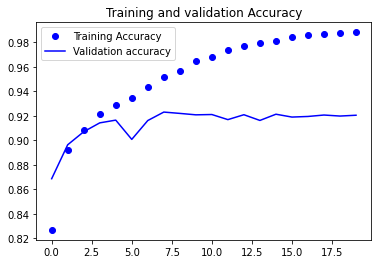

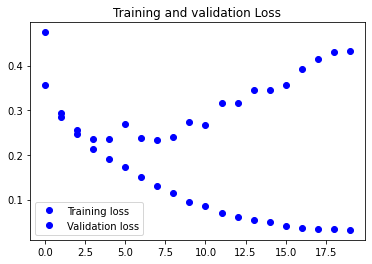

In [ ]:
accuracy=fashion_train.history['accuracy']
val_accuracy=fashion_train.history['val_accuracy']
loss=fashion_train.history['loss']
val_loss=fashion_train.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'bo',label='Validation loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

#On obtient overfitting sur notre class validation et pour eviter on va ajouter des layers Dropout qui va eliminer des data Hyperparametres et on resolu ce probleme

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25)) # Voila des layers dropout pour resoudre la probleme
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

#ICI J'AJOUTE D'AUTRE MODEL PLUS COURT QUE L'ANCIEN ET JE SAUVEGARDER CE MODEL 

In [ ]:
fashion_model_court = Sequential()
fashion_model_court.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model_court.add(LeakyReLU(alpha=0.1))
fashion_model_court.add(MaxPooling2D((2, 2),padding='same'))
fashion_model_court.add(Dropout(0.25)) # Voila des layers dropout pour resoudre la probleme
fashion_model_court.add(Flatten())
fashion_model_court.add(Dense(128, activation='linear'))
fashion_model_court.add(LeakyReLU(alpha=0.1))           
fashion_model_court.add(Dropout(0.3))
fashion_model_court.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model_court.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                        

In [ ]:
fashion_model_court.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout_court = fashion_model_court.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 36s 46ms/step - loss: 0.4610 - accuracy: 0.8357 - val_loss: 0.3311 - val_accuracy: 0.8805
Epoch 2/20
750/750 [==============================] - 35s 47ms/step - loss: 0.3165 - accuracy: 0.8847 - val_loss: 0.3032 - val_accuracy: 0.8913
Epoch 3/20
750/750 [==============================] - 37s 49ms/step - loss: 0.2797 - accuracy: 0.8973 - val_loss: 0.2808 - val_accuracy: 0.8992
Epoch 4/20
750/750 [==============================] - 46s 61ms/step - loss: 0.2566 - accuracy: 0.9055 - val_loss: 0.2680 - val_accuracy: 0.9004
Epoch 5/20
750/750 [==============================] - 35s 47ms/step - loss: 0.2383 - accuracy: 0.9123 - val_loss: 0.2551 - val_accuracy: 0.9067
Epoch 6/20
750/750 [==============================] - 36s 47ms/step - loss: 0.2214 - accuracy: 0.9173 - val_loss: 0.2534 - val_accuracy: 0.9092
Epoch 7/20
750/750 [==============================] - 34s 46ms/step - loss: 0.2113 - accuracy: 0.9215 - val_loss: 0.2547 - val_accuracy:

In [ ]:
fashion_model_court.save("Fashion_court_model.h5py")

INFO:tensorflow:Assets written to: Fashion_court_model..h5py/assets


In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 103s 137ms/step - loss: 0.6051 - accuracy: 0.7729 - val_loss: 0.3700 - val_accuracy: 0.8643
Epoch 2/20
261/750 [=========>....................] - ETA: 58s - loss: 0.4023 - accuracy: 0.8507

KeyboardInterrupt: ignored

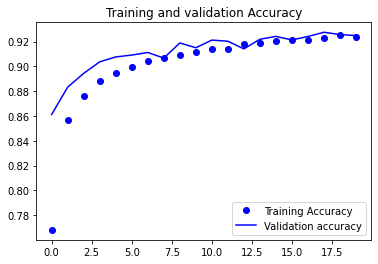

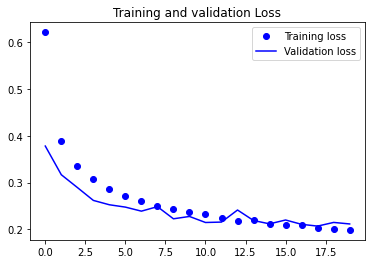

In [ ]:
accuracy_drop=fashion_train_dropout.history['accuracy']
val_accuracy_drop=fashion_train_dropout.history['val_accuracy']
loss_drop=fashion_train_dropout.history['loss']
val_loss_drop=fashion_train_dropout.history['val_loss']
epochs=range(len(accuracy_drop))
plt.plot(epochs,accuracy_drop,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy_drop,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss_drop,'bo',label='Training loss')
plt.plot(epochs,val_loss_drop,'b',label='Validation loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

## maintenant on va sauvergarder notre model pour prochaine utilisation

In [ ]:
fashion_model.save("fashion_Long_model.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [ ]:
test_eval = fashion_model.evaluate(X_test, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 20ms/step - loss: 0.2214 - accuracy: 0.9188


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2214265614748001
Test accuracy: 0.9187999963760376


In [ ]:
predicted_classes = fashion_model.predict(X_test)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found 9144 correct labels


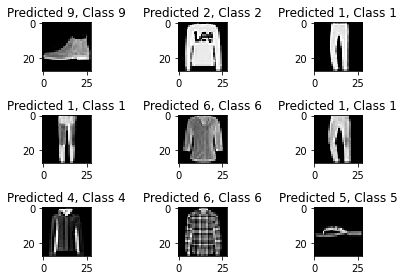

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 856 incorrect labels


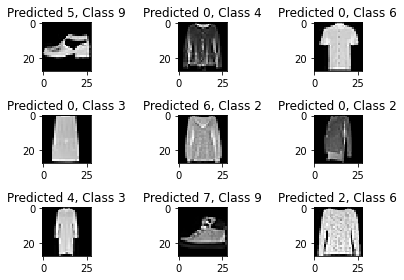

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.92      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.85      0.90      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.90      0.81      0.86      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.81      0.72      0.76      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.99      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

